Aula 1 ----------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salário': 'salário',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residência',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salary', 'moeda', 'usd',
       'residência', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [ ]:
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(mapeamento_remoto)

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residência,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano,salary,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Aula 2 ----------------------------------------------------------------------------------------------

In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salary,0
moeda,0
usd,0
residência,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:

import numpy as np

# Criação de um dataframe para exemplo
df_salarios = pd.DataFrame({
  'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
  'salario':[4000, np.nan, 5000, np.nan, 100000]
})

# calcula a média salarial e substitui os nulos pela média e arredonda
df_salarios['salario_media']= df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calcula mediana e substitui os nulos pela mediana
df_salarios['salario_mediana']= df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
df_temperaturas = pd.DataFrame({
  'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
  'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terça,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [ ]:
df_temperaturas = pd.DataFrame({
  'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
  'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,segunda,30.0,30.0
1,terça,NaN,28.0
2,quarta,NaN,28.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
  'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
  'cidade': ['SP', np.nan, 'Curitiba', np.nan, 'Belem']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,SP,SP
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belem,Belem


In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salary,0
moeda,0
usd,0
residência,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salary           133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residência       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

Aula 3 ----------------------------------------------------------------------------------------------

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,moeda,usd,residência,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'distribuiçao de senioridade'}, xlabel='senioridade'>

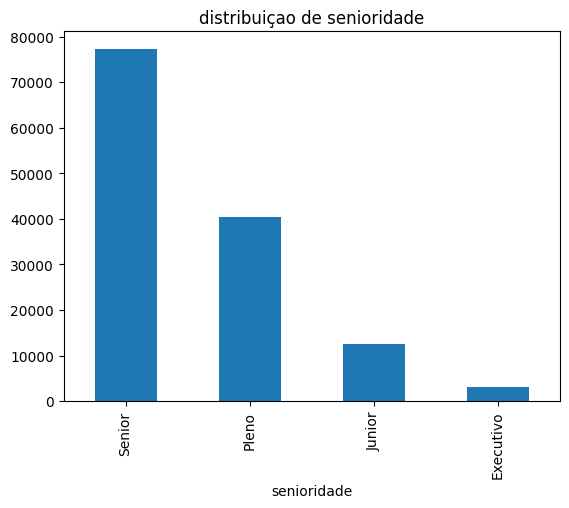

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='distribuiçao de senioridade')

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

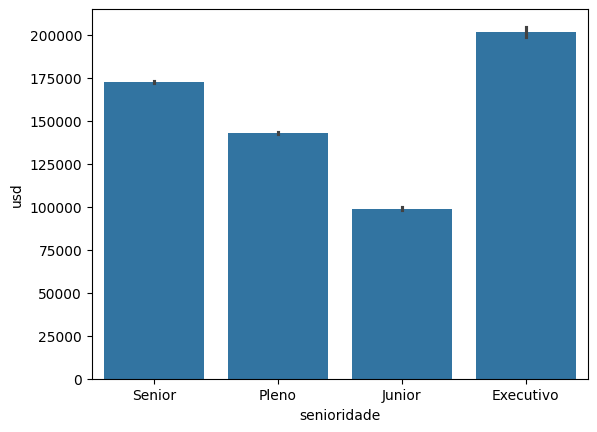

In [ ]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [ ]:
import matplotlib.pyplot as plt

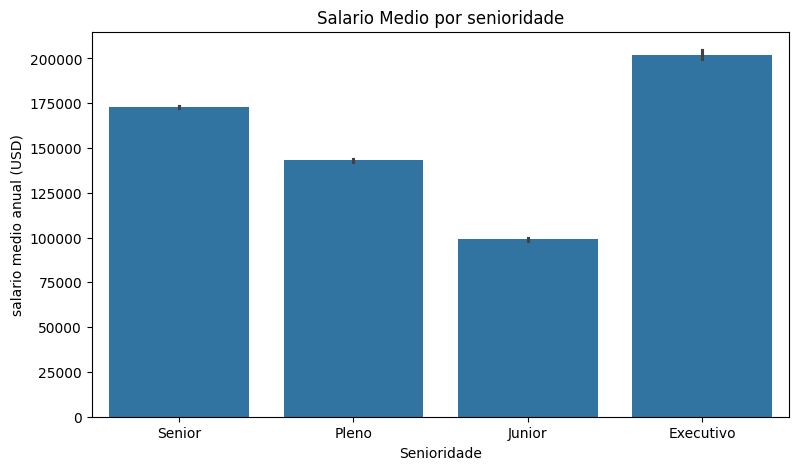

In [ ]:

# Tamanho da imagem
plt.figure(figsize = (9,5))

# Replicado o negocio de antes
sns.barplot(data=df_limpo, x='senioridade', y='usd')

# Título
plt.title('Salario Medio por senioridade')

# Definindo cada label(rotulo)
plt.xlabel('Senioridade')
plt.ylabel('salario medio anual (USD)')

# Para apresentar
plt.show()

In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = True)

,usd
senioridade,
Junior,99034.963267
Pleno,143044.845979
Senior,172850.838301
Executivo,202027.667813


In [ ]:
# True do menor para o maior
# False do maior para o menor
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = True).index

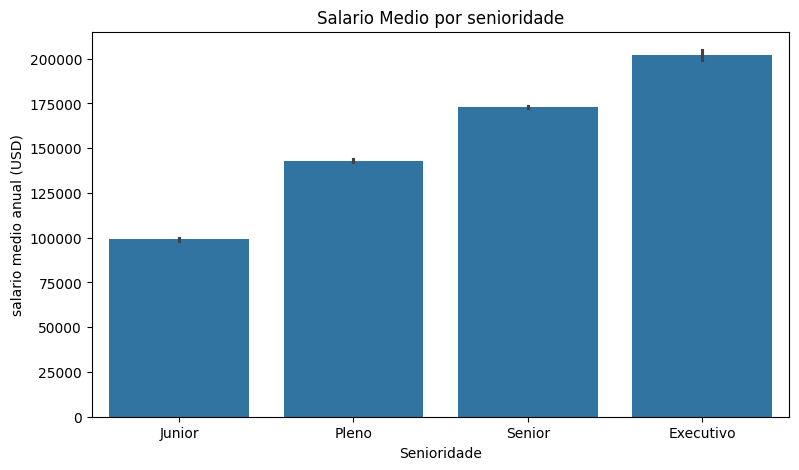

In [ ]:

# Tamanho da imagem
plt.figure(figsize = (9,5))

# Replicado o negocio de antes e ordenar
sns.barplot(data=df_limpo, x='senioridade', y='usd', order = ordem)

# Título
plt.title('Salario Medio por senioridade')

# Definindo cada label(rotulo)
plt.xlabel('Senioridade')
plt.ylabel('salario medio anual (USD)')

# Para apresentar
plt.show()

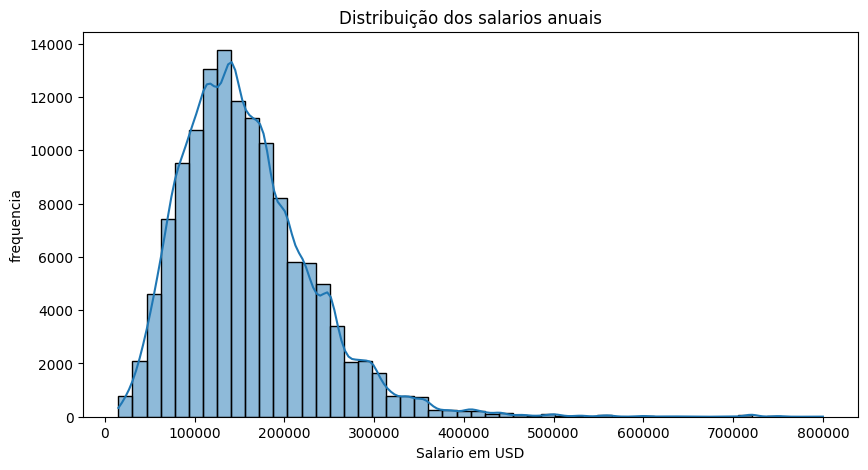

In [ ]:
plt.figure(figsize=(10,5))

'''o True adicina as linhas e false tira a linha que tipo que contorna'''
sns.histplot(df_limpo['usd'], bins = 50, kde = True)

# Título
plt.title('Distribuição dos salarios anuais')

# Definindo cada label(rotulo)
plt.xlabel('Salario em USD')
plt.ylabel('frequencia')

# Para apresentar
plt.show()

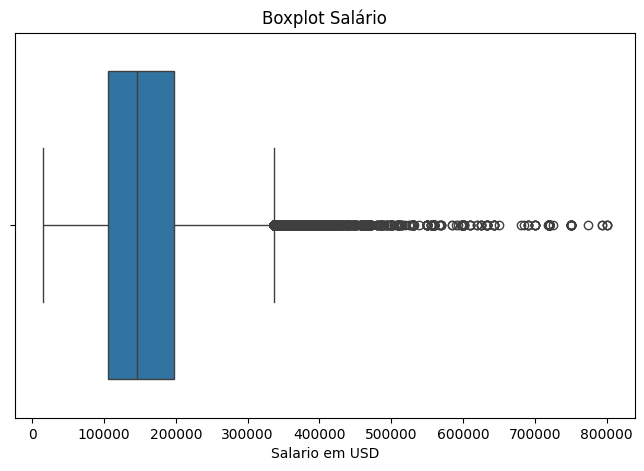

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
# Título
plt.title('Boxplot Salário')

# Definindo cada label(rotulo)
plt.xlabel('Salario em USD')

# Para apresentar
plt.show()

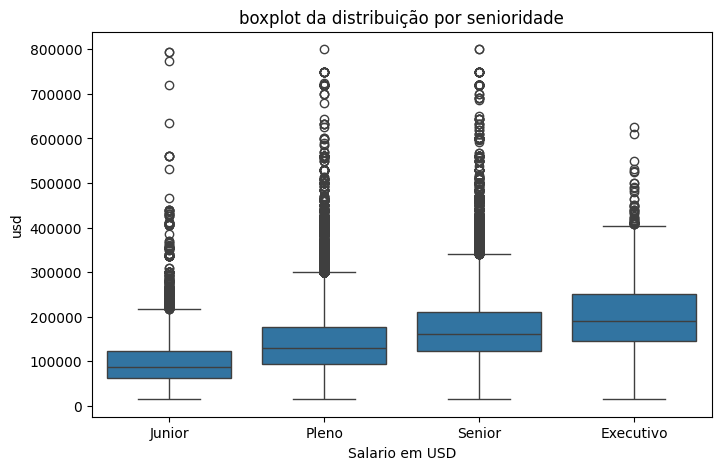

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)

# Título
plt.title('boxplot da distribuição por senioridade')

# Definindo cada label(rotulo)
plt.xlabel('Salario em USD')

# Para apresentar
plt.show()

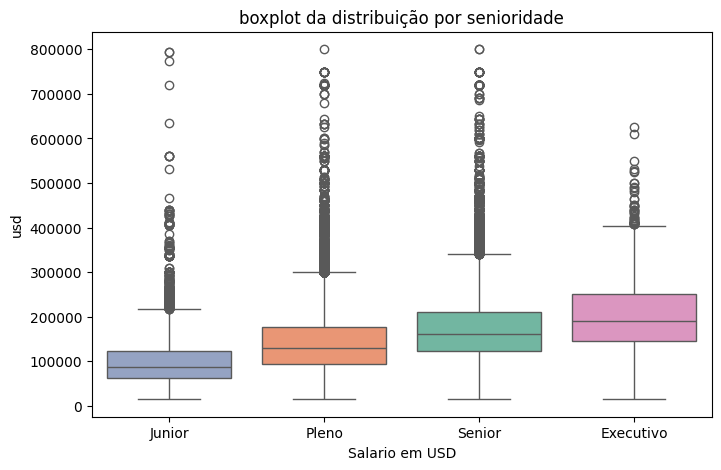

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade,palette='Set2',hue='senioridade')

# Título
plt.title('boxplot da distribuição por senioridade')

# Definindo cada label(rotulo)
plt.xlabel('Salario em USD')

# Para apresentar
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(df_limpo, x='senioridade', y='usd', title='Média Salarial por Senioridade')
fig.show()

In [ ]:
fig = px.bar(df_limpo.groupby('senioridade')['usd'].mean().reset_index(),
             x='senioridade', # Define o eixo x como 'senioridade'
             y='usd', # Define o eixo y como 'usd' (salário médio)
             title='Média Salarial por Senioridade', # Define o título do gráfico
             color='senioridade', # Define a cor das barras com base na senioridade
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'}, # Define os rótulos dos eixos
             template='plotly_white') # Define o tema do gráfico
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Junior', 'Pleno', 'Senior', 'Executivo']}) # Define a ordem das categorias no eixo x
fig.show() # Exibe o gráfico

In [ ]:
fig = px.pie(df_limpo.groupby('remoto')['usd'].mean().reset_index(),
             names='remoto',  # Define os nomes das fatias como 'remoto'
             values='usd',    # Define os valores para o tamanho das fatias como 'usd' (salário médio)
             title='proporção dos tipos de trabalhos', # Define o título do gráfico
             color='remoto', # Define a cor das fatias com base na modalidade remota
             template='plotly_white') # Define o tema do gráfico

fig.update_traces(textposition='inside', textinfo='percent+label') # Mostra o percentual e o rótulo dentro de cada fatia
fig.show() # Exibe o gráfico

In [ ]:
fig = px.pie(df_limpo.groupby('remoto')['usd'].mean().reset_index(),
             names='remoto',  # Define os nomes das fatias como 'remoto'
             values='usd',    # Define os valores para o tamanho das fatias como 'usd' (salário médio)
             title='proporção dos tipos de trabalhos', # Define o título do gráfico
             color='remoto', # Define a cor das fatias com base na modalidade remota
             template='plotly_white', # Define o tema do gráfico
             hole=0.5)

fig.update_traces(textposition='inside', textinfo='percent+label') # Mostra o percentual e o rótulo dentro de cada fatia
fig.show() # Exibe o gráfico